<a href="https://colab.research.google.com/github/FajarKKP/CodingPractice/blob/main/Final_Project_LogFuzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=2368e85e47de00501f9a3f446355675f007cf79ec72b748cee689a4f101bf888
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [3]:
# Library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Universe
ide = np.arange(0, 100, 1)
sesuai = np.arange(0, 100, 1)
implementasi = np.arange(0,100 , 1)

overall = np.arange(0, 100, 1)


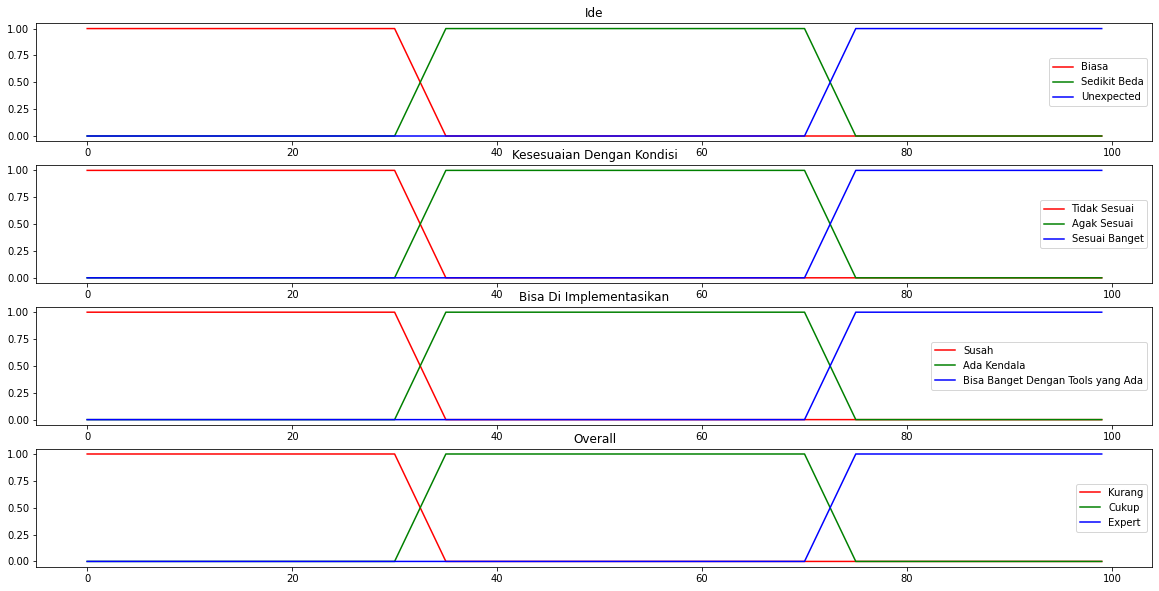

In [11]:
# Membership Function
ide_lo = fuzz.trapmf(ide, [0,0,30,35])
ide_md = fuzz.trapmf(ide, [30,35,70,75])
ide_hi = fuzz.trapmf(ide, [70,75,100,100])

sesuai_lo = fuzz.trapmf(sesuai, [0,0,30,35])
sesuai_md = fuzz.trapmf(sesuai, [30,35,70,75])
sesuai_hi = fuzz.trapmf(sesuai, [70,75,100,100])

implementasi_lo = fuzz.trapmf(implementasi, [0,0,30,35])
implementasi_md = fuzz.trapmf(implementasi, [30,35,70,75])
implementasi_hi = fuzz.trapmf(implementasi, [70,75,100,100])

overall_lo = fuzz.trapmf(overall, [0,0,30,35])
overall_md = fuzz.trapmf(overall, [30,35,70,75])
overall_hi = fuzz.trapmf(overall, [70,75,100,100])

# Visualize Membership
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(20,10))

ax0.plot(ide, ide_lo, 'r', linewidth=1.5, label='Biasa')
ax0.plot(ide, ide_md, 'g', linewidth=1.5, label='Sedikit Beda')
ax0.plot(ide, ide_hi, 'b', linewidth=1.5, label='Unexpected')
ax0.set_title('Ide')
ax0.legend()

ax1.plot(sesuai, sesuai_lo, 'r', linewidth=1.5, label='Tidak Sesuai')
ax1.plot(sesuai, sesuai_md, 'g', linewidth=1.5, label='Agak Sesuai')
ax1.plot(sesuai, sesuai_hi, 'b', linewidth=1.5, label='Sesuai Banget')
ax1.set_title('Kesesuaian Dengan Kondisi')
ax1.legend()

ax2.plot(implementasi, implementasi_lo, 'r', linewidth=1.5, label='Susah')
ax2.plot(implementasi, implementasi_md, 'g', linewidth=1.5, label='Ada Kendala')
ax2.plot(implementasi, implementasi_hi, 'b', linewidth=1.5, label='Bisa Banget Dengan Tools yang Ada')
ax2.set_title('Bisa Di Implementasikan')
ax2.legend()

ax3.plot(overall, overall_lo, 'r', linewidth=1.5, label='Kurang')
ax3.plot(overall, overall_md, 'g', linewidth=1.5, label='Cukup')
ax3.plot(overall, overall_hi, 'b', linewidth=1.5, label='Expert')
ax3.set_title("Overall")
ax3.legend()

In [32]:
# Masukkan Nilai
print("Masukkan nilai anda (skala 1-100): ")
a = input("Ide: ")
b = input("Kesesuaian:")
c = input("Implementasi: ")


Masukkan nilai anda (skala 1-100): 
Ide: 20
Kesesuaian:30
Implementasi: 10


Text(0.5, 1.0, 'Output membership activity')

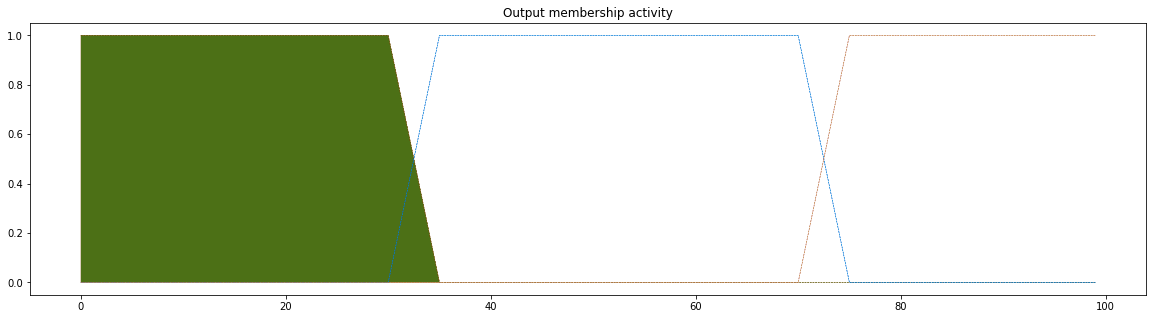

In [33]:
# Penetapan Rules
ide_lvl_lo = fuzz.interp_membership(ide, ide_lo, a)
ide_lvl_md = fuzz.interp_membership(ide, ide_md, a)
ide_lvl_hi = fuzz.interp_membership(ide, ide_hi, a)

sesuai_lvl_lo = fuzz.interp_membership(sesuai, sesuai_lo, b)
sesuai_lvl_md = fuzz.interp_membership(sesuai, sesuai_md, b)
sesuai_lvl_hi = fuzz.interp_membership(sesuai, sesuai_hi, b)

implementasi_lvl_lo = fuzz.interp_membership(implementasi, implementasi_lo, c)
implementasi_lvl_md = fuzz.interp_membership(implementasi, implementasi_md, c)
implementasi_lvl_hi = fuzz.interp_membership(implementasi, implementasi_hi, c)


# Rules
# If biasa and tidak sesuai and susah then kurang
rule1 = np.fmin(ide_lvl_lo, np.fmin(sesuai_lvl_lo, implementasi_lvl_lo))
activate1 = np.fmin(rule1, overall_lo)

# If biasa or tidak sesuai then kurang
rule2 = np.fmax(ide_lvl_lo, sesuai_lvl_lo)
activate2 = np.fmin(rule2, overall_lo)

# If sedikit beda or agak sesuai or ada kendala then cukup
rule3 = np.fmax(ide_lvl_md, np.fmax(sesuai_lvl_md, implementasi_lvl_md))
activate3 = np.fmin(rule3, overall_md)

# If unexpected and sesuai banget and susah then cukup
rule4 = np.fmin(ide_lvl_hi, np.fmin(sesuai_lvl_hi, implementasi_lvl_hi))
activate4 = np.fmin(rule4, overall_md)

# If unexpected and sesuai banget then expert
rule5 = np.fmin(ide_lvl_hi, sesuai_lvl_hi)
activate5 = np.fmin(rule5, overall_hi)

# If unexpected and sesuai banget and bisa dengan tools then expert
rule6 = np.fmax(ide_lvl_hi, np.fmax(sesuai_lvl_hi, implementasi_lvl_hi))
activate6 = np.fmin(rule6, overall_hi)
overall0 = np.zeros_like(overall)

fig, ax0 = plt.subplots(figsize=(20, 5))

ax0.fill_between(overall, overall0, activate1, facecolor='r', alpha=0.7)
ax0.plot(overall, overall_lo, 'r', linewidth=0.5, linestyle='--', )
ax0.fill_between(overall, overall0, activate2, facecolor='g', alpha=0.7)
ax0.plot(overall, overall_lo, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, activate3, facecolor='b', alpha=0.7)
ax0.plot(overall, overall_md, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, activate4, facecolor='c', alpha=0.7)
ax0.plot(overall, overall_md, 'c', linewidth=0.5, linestyle='--', )
ax0.fill_between(overall, overall0, activate5, facecolor='m', alpha=0.7)
ax0.plot(overall, overall_hi, 'm', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, activate6, facecolor='y', alpha=0.7)
ax0.plot(overall, overall_hi, 'y', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

Nilai akhir:
16.282051282051285


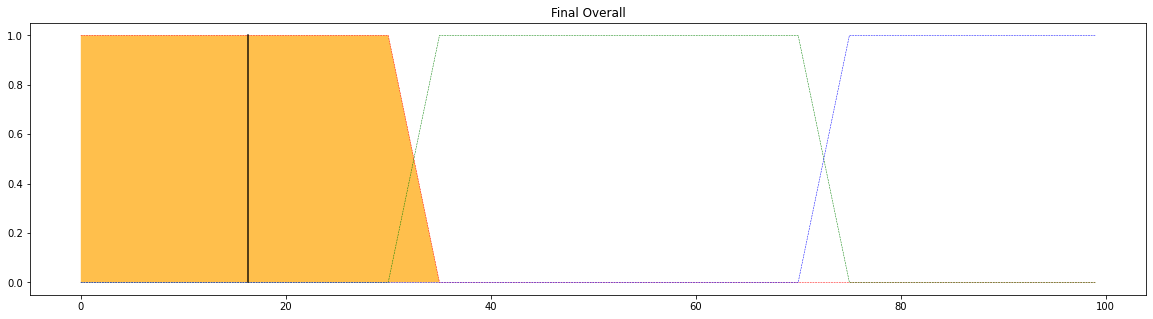

In [35]:
# Defuzzification
aggregated = np.fmax(activate1,np.fmax(activate2, np.fmax(activate3,np.fmax(activate4, np.fmax(activate5, activate6)))))

# Calculate defuzzification
overall_final = fuzz.defuzz(overall, aggregated, "centroid")
activate_ovr_final = fuzz.interp_membership(overall, aggregated, overall_final)

# Visualize final
fig, ax0 = plt.subplots(figsize=(20, 5))
ax0.plot(overall, overall_lo, 'r', linewidth=0.5, linestyle='--')
ax0.plot(overall, overall_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(overall, overall_hi, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([overall_final, overall_final], [0, activate_ovr_final], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Final Overall')

print("Nilai akhir:")
print(overall_final)